**Name:** <span style="color:red">Maria Cobo and Alba Mas</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 2 (PART 2)
# Network percolation

---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to `practical9_name1_name2.ipynb`, where `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aul@-ESCI***.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

In this session we will study the percolation transition in random networks. To that end we will use the Python package `NetworkX`.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import poisson

First, use the **NetworkX** function `erdos_renyi_graph` to generate an Erdös-Renyi random network with $n=10000$ nodes and connection probability $p=0.0005$. Plot the degree distribution.

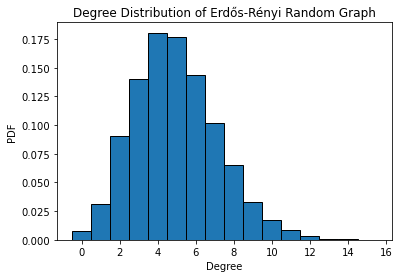

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

n = 10000   # number of nodes
p = 0.0005  # connection probability

# Generate the Erdős-Rényi graph
G = nx.erdos_renyi_graph(n, p)

degrees = [degree for node, degree in G.degree()]

plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), density=True, edgecolor='black', align='left')

plt.xlabel('Degree')
plt.ylabel('PDF')
plt.title('Degree Distribution of Erdős-Rényi Random Graph')
plt.show()


---

<span style="color:red">Comment your result here:</span>

The distribution exhibits a clear peak at lower degrees, suggesting that most nodes in the network have a small number of connections. This is a typical characteristic of random networks where most nodes have low degrees, while only a few have higher degrees.

Although the majority of nodes have low degrees, the tail of the distribution extends towards higher degrees, indicating that there are a small number of nodes that are significantly more connected. 

---

Verify that the degree distribution obtained above matches a Poisson distribution with mean equal to the average degree of the network.

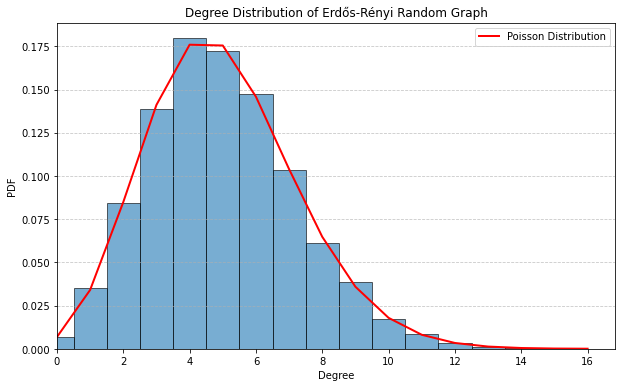

In [3]:
n = 10000   # number of nodes
p = 0.0005  # connection probability

# Generate the Erdős-Rényi graph
G = nx.erdos_renyi_graph(n, p)

degrees = [degree for node, degree in G.degree()]

average_degree = np.mean(degrees)

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), density=True, edgecolor='black', align='left', alpha=0.6)

x = np.arange(0, max(degrees) + 1)

# Calculate the Poisson distribution
poisson_pmf = poisson.pmf(x, average_degree)

# Plot the Poisson distribution curve
plt.plot(x, poisson_pmf, 'r-', linewidth=2, label='Poisson Distribution'.format(average_degree))

plt.xlabel('Degree')
plt.ylabel('PDF')
plt.title('Degree Distribution of Erdős-Rényi Random Graph')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(left=0)  # Start x-axis from 0
plt.ylim(bottom=0)  # Start y-axis from 0
plt.show()


We will now study the percolation transition discussed in class. To that end, generate an ensemble of Erdös-Renyi networks (e.g. 100 networks) with 1000 nodes each. Compute for each network the fraction of nodes that belong to the largest connected component, and calculate its average over the ensemble of networks with a given connection probability $p$. Repeat this calculation for a range of values of $p$ between $0$ and $10/n$, with $n$ being the number of nodes of the network.

In [8]:
n = 1000  # number of nodes
num_graphs = 100  # number of networks to generate
p_values = np.linspace(0, 10/n, 100)  # range of connection probabilities

# Store the average fraction of nodes in the largest connected component for each p
average_fractions = []

for p in p_values:
    fractions = []
    
    # Generate num_graphs Erdős-Rényi networks
    for _ in range(num_graphs):
        G = nx.erdos_renyi_graph(n, p)
        
        largest_cc = max(nx.connected_components(G), key=len)
        
        fraction = len(largest_cc) / n
        fractions.append(fraction)
    
    average_fractions.append(np.mean(fractions))


Finally, plot the transition curve.

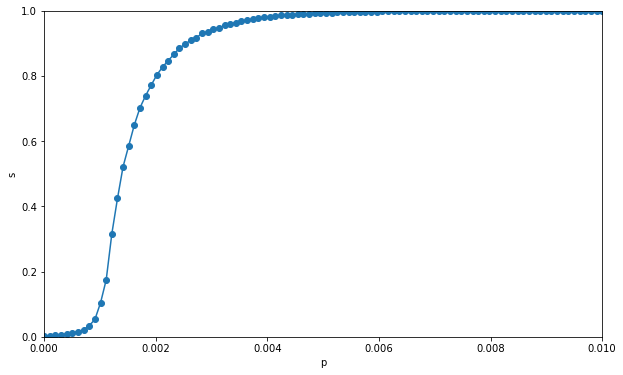

In [14]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(p_values, average_fractions, marker='o')
plt.xlabel('p')
plt.ylabel('s')
plt.xlim(0, 10/n)  
plt.ylim(0, 1)
plt.show()

---

<span style="color:red">Comment your result here</span>

The plot shows the percolation transition in an Erdös-Renyi network. At first, when the connection probability p is very small, the fraction of nodes in the largest connected component s is close to zero. This means that the network consists mostly of small, disconnected clusters. As p increases, there’s a critical point (around p≈0.002 for a network of 1000 nodes) where a giant connected component suddenly forms. After this point, the size of the largest component grows rapidly, and soon almost all nodes are part of this giant component. As p continues to increase, s levels off near 1, meaning that most of the network is connected. This sharp transition is typical of percolation in random networks.

---